In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanics/titanic.txt
/kaggle/input/ultima/ultima_all_clean.txt


## Ex 1
Remove missing data / 
Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

In [84]:
#Set Data
data = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
data_clean = data 
data_clean = data_clean.dropna(0,'any')
data_clean = data_clean.set_index('hn')
data_clean = data_clean.drop(['hiv','size','utmet','vgmet','surgery','pchemo'],1)
data_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

In [85]:
data_clean['age'] = np.where(data_clean['age'] > 20 ,'Old','Young')
data_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


Separate data into groups based on pmmet values

In [86]:
pmmet_one = data_clean[(data_clean['pmmet'] == 1.0)]
pmmet_one

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [87]:
pmmet_zero = data_clean[(data_clean['pmmet'] == 0.0)]
pmmet_zero

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


for each group, randomly choose 10 data

In [88]:
random_zero = pmmet_zero.sample(10)
random_zero

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3202710,Old,3,1.0,0,0.0,2.5,2.0,4.0,2.5,2.0,34.0,1.0,2.0,0.0,0.0,0.0,0.0
3149944,Old,1,0.0,0,1.0,0.0,5.0,4.0,0.0,2.0,29.0,5.0,2.0,0.0,0.0,0.0,2.0
2653558,Old,1,0.0,0,0.0,1.5,2.0,4.0,1.0,1.0,17.0,0.0,2.0,0.0,1.0,0.0,2.0
3072638,Old,3,0.0,1,0.0,5.0,1.0,5.0,2.0,1.0,15.0,3.0,3.0,0.0,0.0,0.0,2.0
3157566,Old,1,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,24.0,15.0,3.0,0.0,0.0,0.0,2.0
2583140,Old,3,0.0,0,0.0,2.0,2.0,4.0,3.0,1.0,35.0,999.0,3.0,0.0,0.0,0.0,0.0
2676436,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,0.0,0.0
3042982,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,15.0,1.0,2.0,1.0,0.0,0.0,0.0
2894081,Old,2,1.0,0,0.0,3.0,2.0,4.0,2.5,3.0,20.0,3.0,3.0,0.0,1.0,0.0,0.0


In [89]:
random_one = pmmet_one.sample(10)
random_one

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2988239,Old,2,0.0,0,0.0,6.0,1.0,6.0,4.5,1.0,27.0,7.0,3.0,0.0,0.0,1.0,0.0
3372727,Old,2,0.0,0,0.0,6.0,1.0,5.0,6.0,3.0,35.0,999.0,3.0,0.0,1.0,1.0,0.0
2872029,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,22.0,999.0,3.0,0.0,1.0,1.0,0.0
2726278,Old,2,0.0,0,0.0,3.0,1.0,4.0,3.0,1.0,32.0,999.0,3.0,0.0,1.0,1.0,0.0
3254555,Old,3,1.0,1,0.0,2.0,3.0,4.0,2.0,1.0,31.0,2.0,3.0,0.0,0.0,1.0,0.0
3152399,Old,6,1.0,1,0.0,3.0,2.0,4.0,3.0,3.0,27.0,999.0,3.0,0.0,1.0,1.0,0.0
3690122,Old,2,0.0,0,0.0,4.0,1.0,4.0,4.0,1.0,19.0,999.0,3.0,0.0,0.0,1.0,2.0
2877840,Old,2,0.0,0,0.0,0.0,5.0,4.0,0.0,1.0,26.0,12.0,3.0,0.0,0.0,1.0,0.0
3794642,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,23.0,999.0,3.0,0.0,1.0,1.0,0.0


# Ex 2
## 1. Patient proportion have disease

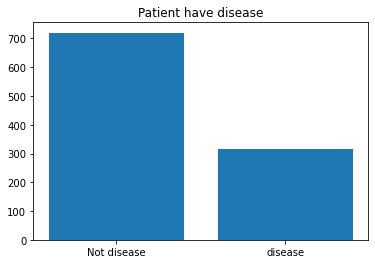

In [90]:
data_clean['disease'] = np.where(data_clean['disease'] == 1.0 ,'Yes','No')

import matplotlib.pyplot as plt
total = data_clean.shape
explode = (0,0.1)
labels = ('Not disease','disease')
plt.title('Patient have disease')
plt.bar(labels,[sum(data_clean['disease'] == 'No'),sum(data_clean['disease'] == 'Yes')])
plt.show()


## 2. proportion of finalhisto

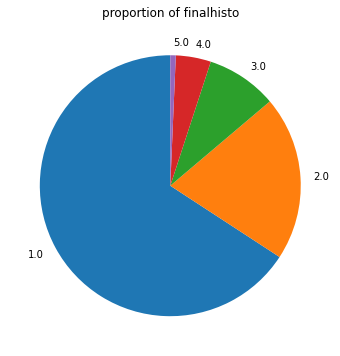

In [91]:
check = np.sort(data_clean['finalhisto'].unique())
total = data_clean.shape
fig = plt.figure(1, figsize=(15,6))
data = [sum(data_clean['finalhisto'] == check[0])/total[0],
       sum(data_clean['finalhisto'] == check[1])/total[0],
       sum(data_clean['finalhisto'] == check[2])/total[0],
       sum(data_clean['finalhisto'] == check[3])/total[0],
       sum(data_clean['finalhisto'] == check[4])/total[0]]
explode = (0, 0, 0, 0, 0) 
plt.title('proportion of finalhisto')
plt.pie(data, labels=check, startangle=90, explode=explode)

plt.show()


In [92]:
data_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,Yes,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,No,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,No,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,No,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,Yes,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,Yes,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,Yes,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,Yes,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


## 3. Menopaus patient have disease

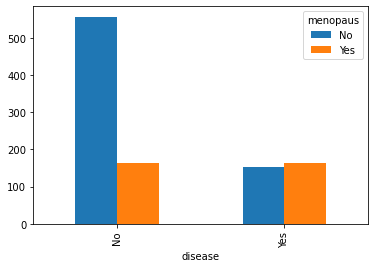

In [93]:
data_clean['menopaus'] = np.where(data_clean['menopaus'] == 1.0 ,'Yes','No')
pd.crosstab(data_clean['disease'],data_clean['menopaus']).plot(kind='bar')

## 4. Total of parity

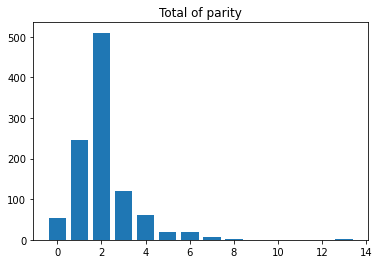

In [94]:
check = np.sort(data_clean['parity'].unique())
total = data_clean.shape
# fig = plt.figure(1, figsize=(20,20))
data = [sum(data_clean['parity'] == check[0]),
       sum(data_clean['parity'] == check[1]),
       sum(data_clean['parity'] == check[2]),
       sum(data_clean['parity'] == check[3]),
       sum(data_clean['parity'] == check[4]),
       sum(data_clean['parity'] == check[5]),
       sum(data_clean['parity'] == check[6]),
       sum(data_clean['parity'] == check[7]),
       sum(data_clean['parity'] == check[8]),
       sum(data_clean['parity'] == check[9])]
plt.title('Total of parity')
plt.bar(check,data)
plt.show()

## 5. Proportion of stage

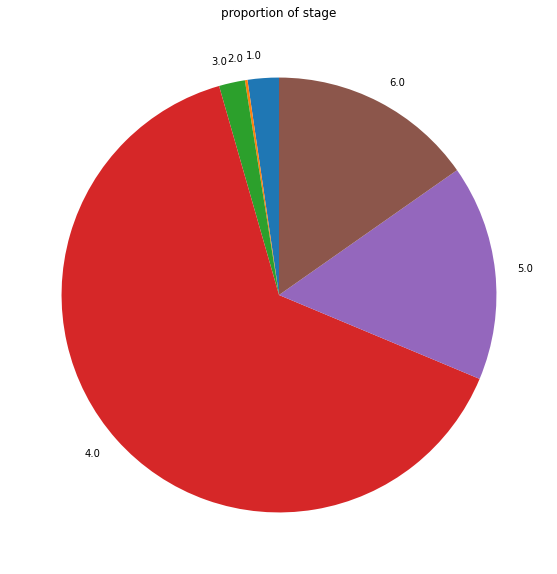

In [95]:
check = np.sort(data_clean['stage'].unique())
data = [sum(data_clean['stage'] == check[0]),
       sum(data_clean['stage'] == check[1]),
       sum(data_clean['stage'] == check[2]),
       sum(data_clean['stage'] == check[3]),
       sum(data_clean['stage'] == check[4]),
       sum(data_clean['stage'] == check[5])]
explode = (0, 0, 0, 0, 0,0) 
fig = plt.figure(1, figsize=(15,10))
plt.title('proportion of stage')
plt.pie(data, labels=check, startangle=90, explode=explode)
plt.show()